# Dealing with inbalanced Dataset

We have a dataset in realisitc proportion, we could oversemple but it will not be good.

We have a lot of IBD events created by Andrea and also a lot of radioactivity events. If we sort them in temporal order we get that there will be a little amount of IBD in all the radioactivity events, because it is more frequently have radioactivity events respect of IBD that are rare. 

So in order to train our ML-algorithm we could use generated IBD events and generated Radioactivity events, so in that cse we have basically the same amount of data and the inbalanced problem will disappear. After the training, we test with inbalaced dataset.

Basically we use a smote 

We will se if it works... -> It worked!

# Loading data

In [73]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [74]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [75]:
all_feature_IBD_He = pd.read_csv("../../../../mnt/fcufino/all_features_IBD_He.csv")

## Checking the dataset size

(array([  51540., 1468385.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

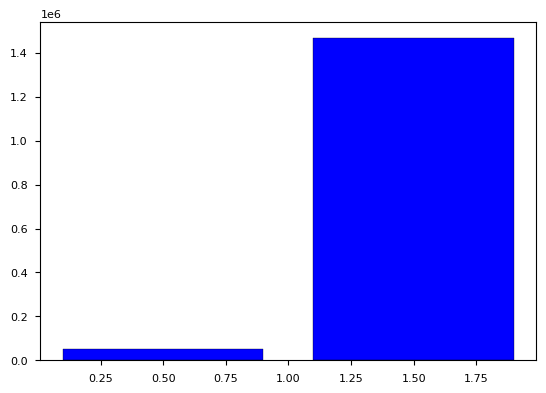

In [76]:
#plot a hist that counts the IBD and BKG
plt.hist(all_feature_IBD_He['Label'], bins = 2, range = (0,2), histtype = 'bar', rwidth = 0.8, color = 'b', label = 'BKG')




# Balancing the dataset

In [77]:
print("BKG: ", all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==0].shape[0])
print("IBD: ", all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==1].shape[0]) 

BKG:  51540
IBD:  1468385


Sotto per mostrare che nel dataset BKG ci sono anche IBD non correlati

In [78]:
print(all_feature_IBD_He['Source'][all_feature_IBD_He["Label"]==0].unique())

[0. 1.]


In [79]:
for key in all_feature_IBD_He.keys():
    print(key)
print(all_feature_IBD_He.keys())

R_prompt
R_delayed
E_pro
delta_time
delta_radius
Label
E_del
Source
Index(['R_prompt', 'R_delayed', 'E_pro', 'delta_time', 'delta_radius', 'Label',
       'E_del', 'Source'],
      dtype='object')


In [80]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==1].shape[0]
num_BKG = all_feature_IBD_He["delta_time"][all_feature_IBD_He['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature_IBD_He.shape[0] - del_IBD
    order = np.argsort(all_feature_IBD_He["Label"])
    all_feature = all_feature_IBD_He.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature_IBD_He["Label"])
    all_feature = all_feature_IBD_He.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", num_BKG - del_BKG) 
print("IBD:", num_IBD - del_IBD)

BKG: 51540
IBD: 51540


# Plots

In [109]:
print(np.logical_and(all_feature["Label"] == 0 , True).sum())
print(np.logical_and(all_feature["Label"] == 1 , True).sum())

51540
51540


In [110]:
all_feature_IBD_He[all_feature_IBD_He['Label']==0].describe()

Boolean Series key will be reindexed to match DataFrame index.


,R_prompt,R_delayed,E_pro,delta_time,delta_radius,Label,E_del,Source
count,51540.000000,51540.000000,51540.000000,5.154000e+04,51540.000000,51540.0,51540.000000,51540.000000
mean,13217.818278,13200.884025,3.637780,2.731694e+05,2765.297156,0.0,2.341956,0.128522
std,3398.112042,3405.616599,1.479604,2.416467e+05,6484.842352,0.0,0.580165,0.334673
min,472.395857,0.000006,0.184581,7.680000e+02,4.989534,0.0,0.232103,0.000000
25%,11136.333204,11100.110596,2.382273,8.601600e+04,243.844948,0.0,2.202244,0.000000
50%,13966.778320,13971.937500,3.540572,1.966080e+05,398.017471,0.0,2.242224,0.000000
75%,15977.854004,15958.366455,4.687610,3.932160e+05,711.485535,0.0,2.283762,0.000000
max,17400.045457,17400.049196,11.130800,1.099873e+06,33901.373464,0.0,11.446635,1.000000


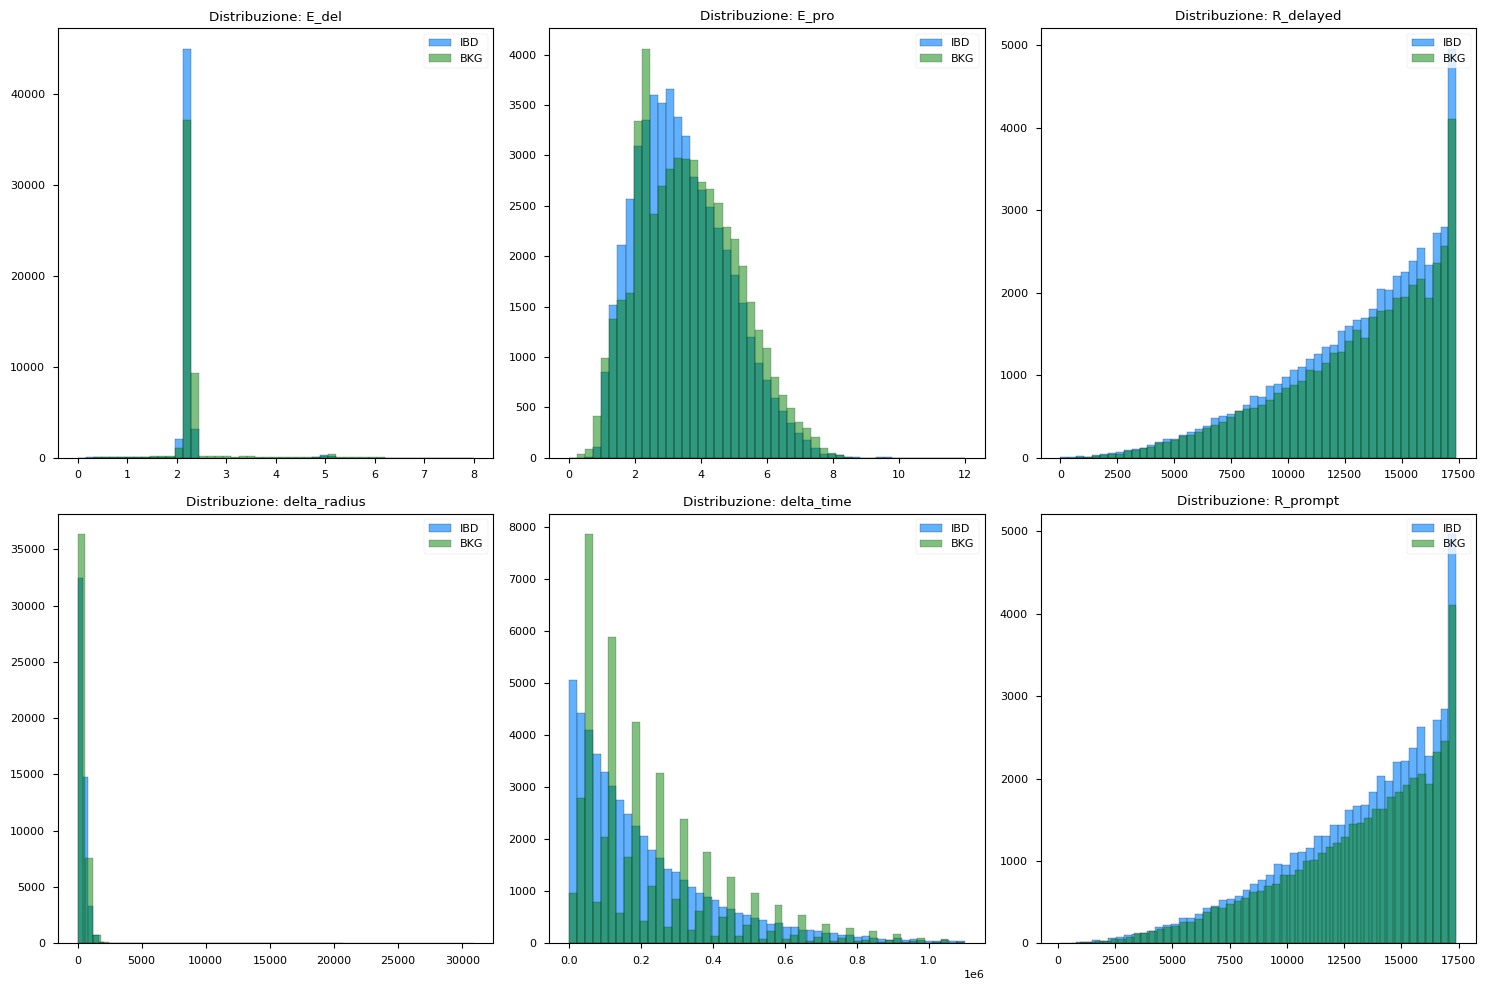

In [114]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,50), color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,50), color='green',alpha = 0.5, label='BKG')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,50), color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,50), color='green',alpha = 0.5, label='BKG')
    else:
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=50, color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Source'] == 0],bins=50, color='green',alpha = 0.5, label='BKG')
    

 
    ax.set_title(f'Distribuzione: {feature}')
    ax.legend(loc='upper right')
    

plt.tight_layout()
plt.show()

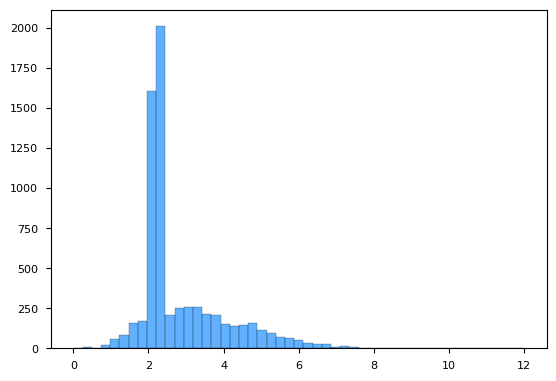

In [135]:
plt.hist(all_feature['E_pro'][(all_feature['Label'] == 0) & (all_feature['Source'] == 1)],np.linspace(0,12,50), color='dodgerblue',alpha = 0.7, label='IBD')
plt.show()

# ML Classification Algorithms

In [115]:
print(all_feature['delta_time'].shape)
print(all_feature['delta_time'].shape)
print(all_feature['E_del'].shape)
print(all_feature['E_pro'].shape)
print(all_feature['R_delayed'].shape)
print(all_feature['R_prompt'].shape)
print(all_feature['delta_radius'].shape)

(103080,)
(103080,)
(103080,)
(103080,)
(103080,)
(103080,)
(103080,)


## Creating train and test datasets

Tolgo delta time perchè ha il problema del timestamp e credo che 

In [116]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source', "delta_time"]


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

## XGBClassifier

In [117]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

In [119]:
from sklearn.metrics import accuracy_score
import os
import xgboost as xgb

scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()

model_path = "xgboost2.model"

# Verifica se il file del modello esiste
if os.path.isfile(model_path):
    # Carica il modello da file
    model = xgb.sklearn.XGBClassifier()
    model.load_model(model_path)
    print("Model loaded")
else:
    # Crea e addestra il modello se il file non esiste
    model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=200, max_depth=5, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
    print("Finished training")

    # Salva il modello in file
    model.save_model(model_path)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Calcola l'accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


[0]	validation_0-error:0.34597	validation_0-logloss:0.68557	validation_1-error:0.35264	validation_1-logloss:0.68570
[1]	validation_0-error:0.33958	validation_0-logloss:0.67834	validation_1-error:0.34512	validation_1-logloss:0.67850
[2]	validation_0-error:0.33852	validation_0-logloss:0.67209	validation_1-error:0.34434	validation_1-logloss:0.67232
[3]	validation_0-error:0.34159	validation_0-logloss:0.66639	validation_1-error:0.34730	validation_1-logloss:0.66675
[4]	validation_0-error:0.34105	validation_0-logloss:0.66120	validation_1-error:0.34638	validation_1-logloss:0.66158


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[5]	validation_0-error:0.33561	validation_0-logloss:0.65603	validation_1-error:0.34303	validation_1-logloss:0.65655
[6]	validation_0-error:0.33667	validation_0-logloss:0.65147	validation_1-error:0.34415	validation_1-logloss:0.65205
[7]	validation_0-error:0.33480	validation_0-logloss:0.64707	validation_1-error:0.34051	validation_1-logloss:0.64767
[8]	validation_0-error:0.33411	validation_0-logloss:0.64297	validation_1-error:0.33915	validation_1-logloss:0.64367
[9]	validation_0-error:0.33299	validation_0-logloss:0.63920	validation_1-error:0.33823	validation_1-logloss:0.63990
[10]	validation_0-error:0.33367	validation_0-logloss:0.63596	validation_1-error:0.33843	validation_1-logloss:0.63675
[11]	validation_0-error:0.33367	validation_0-logloss:0.63296	validation_1-error:0.33833	validation_1-logloss:0.63378
[12]	validation_0-error:0.33150	validation_0-logloss:0.62989	validation_1-error:0.33571	validation_1-logloss:0.63069
[13]	validation_0-error:0.33141	validation_0-logloss:0.62701	validati

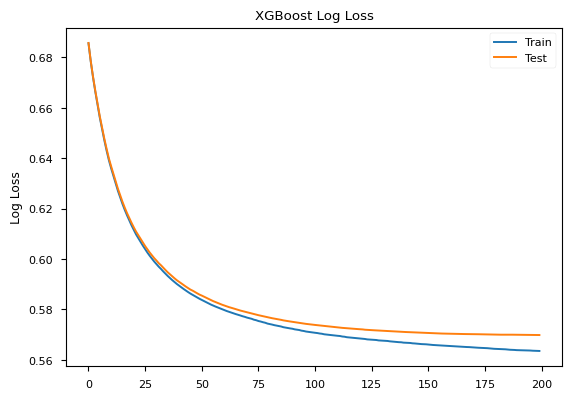

In [120]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


In [121]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.71      0.59      0.64     10397
         1.0       0.64      0.76      0.70     10219

    accuracy                           0.67     20616
   macro avg       0.68      0.67      0.67     20616
weighted avg       0.68      0.67      0.67     20616



array([[6105, 4292],
       [2479, 7740]])

In [122]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['R_prompt', 'R_delayed', 'E_pro', 'delta_time', 'delta_radius', 'E_del', 'Source']


## shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


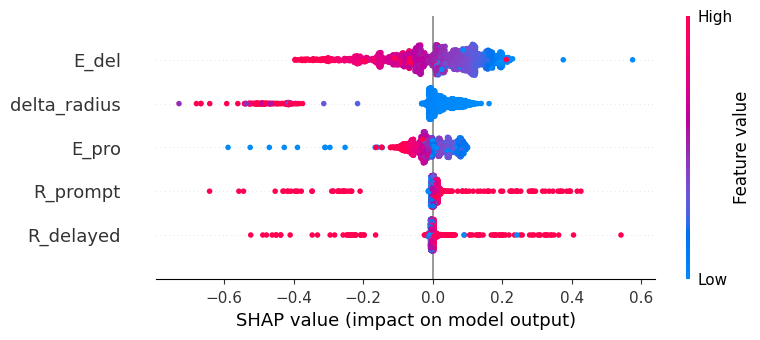

In [123]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names);

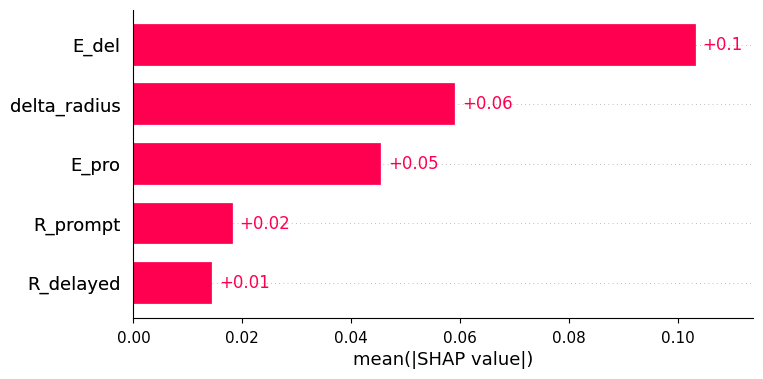

In [124]:
shap.plots.bar(shap_values)

### Selezione BDT sul dataset di sola radioattività

In [103]:
all_feature_r = pd.read_csv("../../../../mnt/fcufino/all_features_IBD_He.csv")

In [104]:
X_rad_df = all_feature_r[(all_feature_r["Label"] == 0) & (all_feature_r["Source"] == 0)]
X_rad = X_rad_df.drop(['Label', 'Source', 'delta_time'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_rad_pred = model.predict(X_rad)

In [105]:
print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

TP = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
TN = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
FN = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
FP = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

21037 su 44916
Efficiency:  53.163683319975064
Purity:  100.0


### Selezione BDT sul dataset di soli veri IBD

In [107]:
X_true_IBD_df = all_feature_r[(all_feature_r["Label"] == 1) & (all_feature_r["Source"] == 1)]
X_true_IBD = X_true_IBD_df.drop(['Label', 'Source', 'delta_time'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_true_IBD_pred = model.predict(X_true_IBD)


In [108]:
print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

Venongono selezionati come IBD  1124792 Su un tot di 1468385
Efficiency:  76.6006190474569
Purity:  100.0


## PyTorch Neural Network

In [ ]:
type(X_train[1:1+4].values)

numpy.ndarray

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# cuda, se disponibile
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definire il DataSet personalizzato
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Creare i set di dati personalizzati
train_dataset = CustomDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).long())
test_dataset = CustomDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).long())

# Creare i DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
import os

# Definire la rete neurale
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # num features from X_train
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, len(y_train.unique()))  # num classes from y_train

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Istanziare la rete e spostarla su cuda  
net = Net().to(device)

# Definire la loss function e l'optimizer
criterion = nn.CrossEntropyLoss()  # Usando la CrossEntropy come funzione di perdita per la classificazione
optimizer = optim.Adam(net.parameters())

model_path = "torch_net.pth"

# Controllare se esiste un file contenente il modello addestrato
if os.path.isfile(model_path):
    # Caricare il modello
    net.load_state_dict(torch.load(model_path))
    net.eval()
    print("Model loaded")
else:
    # Addestrare la rete
    for epoch in range(100):  # 100 epoche
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    print('Finished Training')

    # Salvare il modello
    torch.save(net.state_dict(), model_path)

# Calcolare l'accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs) 
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))


Model loaded
Accuracy of the network on the test data: 99 %


## SVM kernel rbf

In [ ]:
# from sklearn import svm
# # Definisci il modello SVM
# svm_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# y_train = y_train.ravel()
# # Addestra il modello sui dati di train
# svm_rbf.fit(X_train, y_train)

In [ ]:
# accuracy = svm_rbf.score(X_test, y_test)
# print('Accuracy:', accuracy)